In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [4]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [5]:
df.shape

(50000, 2)

In [6]:
# See what values are in sentiment column
print("Sentiment values:")
print(df['sentiment'].value_counts())

# See a sample review
print("\nSample review:")
print(df['review'].iloc[0])

Sentiment values:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64

Sample review:
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and

In [7]:
# Clean the reviews
df['review'] = df['review'].str.replace('<br />', ' ')
df['review'] = df['review'].str.strip()

# Check the cleaned review
print("Cleaned sample review:")
print(df['review'].iloc[0])

# Convert sentiment to numbers (0 = negative, 1 = positive)
df['sentiment'] = (df['sentiment'] == 'positive').astype(int)

print("\nFirst few rows after cleaning:")
print(df.head())

Cleaned sample review:
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.  The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.  It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.  I would say the main appeal of the show is due to the fact that 

In [8]:
df['review_length']=df['review'].str.len()

print("Review Length Statistics:")
print(f"Average length: {df['review_length'].mean():.0f} characters")
print(f"Min length: {df['review_length'].min()} characters")
print(f"Max length: {df['review_length'].max()} characters")

Review Length Statistics:
Average length: 1289 characters
Min length: 32 characters
Max length: 13602 characters


In [9]:
df.head()

,review,sentiment,review_length
0,One of the other reviewers has mentioned that ...,1,1731
1,A wonderful little production. The filming t...,1,968
2,I thought this was a wonderful way to spend ti...,1,906
3,Basically there's a family where a little boy ...,0,718
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1277


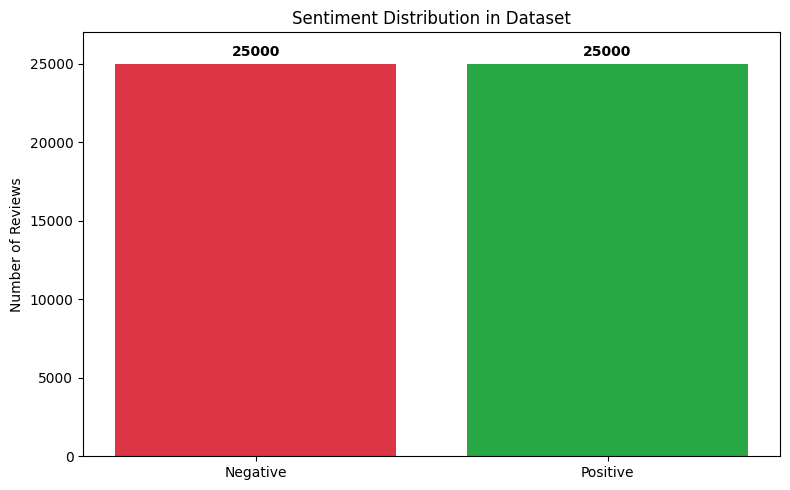

In [11]:
fig, ax = plt.subplots(figsize=(8, 5))
sentiment_labels = ['Negative', 'Positive']
sentiment_counts = df['sentiment'].value_counts().sort_index()
colors = ['#dc3545', '#28a745']

ax.bar(sentiment_labels, sentiment_counts, color=colors)
ax.set_ylabel("Number of Reviews")
ax.set_title("Sentiment Distribution in Dataset")
ax.set_ylim(0, 27000)

for i, v in enumerate(sentiment_counts):
    ax.text(i, v + 500, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [12]:
df.head()

,review,sentiment,review_length
0,One of the other reviewers has mentioned that ...,1,1731
1,A wonderful little production. The filming t...,1,968
2,I thought this was a wonderful way to spend ti...,1,906
3,Basically there's a family where a little boy ...,0,718
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1277


In [13]:
from sklearn.model_selection import train_test_split

# Split data into training (80%) and testing (20%)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['sentiment'])

print(f"Training set size: {len(train_df)}")
print(f"Testing set size: {len(test_df)}")

print(f"\nTraining set - Positive: {(train_df['sentiment'] == 1).sum()}, Negative: {(train_df['sentiment'] == 0).sum()}")
print(f"Testing set - Positive: {(test_df['sentiment'] == 1).sum()}, Negative: {(test_df['sentiment'] == 0).sum()}")

Training set size: 40000
Testing set size: 10000

Training set - Positive: 20000, Negative: 20000
Testing set - Positive: 5000, Negative: 5000


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [15]:
model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [16]:
model.fit(train_df['review'], train_df['sentiment'])

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('tfidf', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"input input: {'filename', 'file', 'content'}, default='content'- If `'filename'`, the sequence passed as an argument to fit is expected to be a list of filenames that need reading to fetch the raw content to analyze.- If `'file'`, the sequence items must have a 'read' method (file-like object) that is called to fetch the bytes in memory.- If `'content'`, the input is expected to be a sequence of items that can be of type string or byte.",'content'
,"encoding encoding: str, default='utf-8'If bytes or files are given to analyze, this encoding is used todecode.",'utf-8'
,"decode_error decode_error: {'strict', 'ignore', 'replace'}, default='strict'Instruction on what to do if a byte sequence is given to analyze thatcontains characters not of the given `encoding`. By default, it is'strict', meaning that a UnicodeDecodeError will be raised. Othervalues are 'ignore' and 'replace'.",'strict'
,"strip_accents strip_accents: {'ascii', 'unicode'} or callable, default=NoneRemove accents and perform other character normalizationduring the preprocessing step.'ascii' is a fast method that only works on characters that havea direct ASCII mapping.'unicode' is a slightly slower method that works on any characters.None (default) means no character normalization is performed.Both 'ascii' and 'unicode' use NFKD normalization from:func:`unicodedata.normalize`.",None
,"lowercase lowercase: bool, default=TrueConvert all characters to lowercase before tokenizing.",True
,"preprocessor preprocessor: callable, default=NoneOverride the preprocessing (string transformation) stage whilepreserving the tokenizing and n-grams generation steps.Only applies if ``analyzer`` is not callable.",None
,"tokenizer tokenizer: callable, default=NoneOverride the string tokenization step while preserving thepreprocessing and n-grams generation steps.Only applies if ``analyzer == 'word'``.",None


In [17]:
sample_review = train_df['review'].iloc[0]
prediction = model.predict([sample_review])[0]
confidence = model.predict_proba([sample_review])[0]

print(f"\nSample review: {sample_review[:200]}...")
print(f"Prediction: {'Positive' if prediction == 1 else 'Negative'}")
print(f"Confidence: {max(confidence):.2%}")


Sample review: I caught this little gem totally by accident back in 1980 or '81. I was at a revival theatre to see two old silly sci-fi movies. The theatre was packed full and (with no warning) they showed a bunch o...
Prediction: Positive
Confidence: 54.04%


Model Performance:
Accuracy: 88.91%
Precision: 88.18%
Recall: 89.86%
F1 Score: 89.01%

Confusion Matrix:
[[4398  602]
 [ 507 4493]]


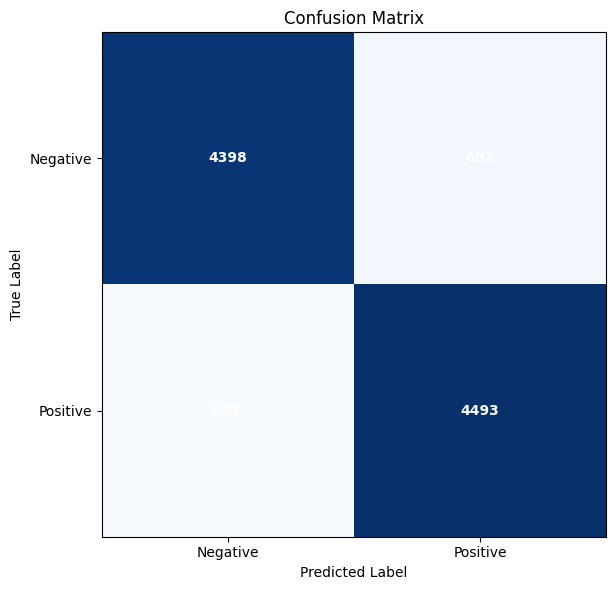

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Make predictions on test data
test_predictions = model.predict(test_df['review'])

# Calculate metrics
accuracy = accuracy_score(test_df['sentiment'], test_predictions)
precision = precision_score(test_df['sentiment'], test_predictions)
recall = recall_score(test_df['sentiment'], test_predictions)
f1 = f1_score(test_df['sentiment'], test_predictions)

print("Model Performance:")
print(f"Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1 Score: {f1:.2%}")

# Confusion Matrix
cm = confusion_matrix(test_df['sentiment'], test_predictions)
print(f"\nConfusion Matrix:")
print(cm)

# Visualize
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(cm, cmap='Blues')
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_yticklabels(['Negative', 'Positive'])
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')
ax.set_title('Confusion Matrix')

for i in range(2):
    for j in range(2):
        text = ax.text(j, i, cm[i, j], ha="center", va="center", color="white", fontweight='bold')

plt.tight_layout()
plt.show()

In [19]:
import pickle

# Save the model
with open('sentiment_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model saved as 'sentiment_model.pkl'")

# Verify it loads correctly
with open('sentiment_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

Model saved as 'sentiment_model.pkl'


In [20]:
df.head()

,review,sentiment,review_length
0,One of the other reviewers has mentioned that ...,1,1731
1,A wonderful little production. The filming t...,1,968
2,I thought this was a wonderful way to spend ti...,1,906
3,Basically there's a family where a little boy ...,0,718
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1277


In [25]:
df['review'][4]

'Petter Mattei\'s "Love in the Time of Money" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter.   This being a variation on the Arthur Schnitzler\'s play about the same theme, the director transfers the action to the present time New York where all these different characters meet and connect. Each one is connected in one way, or another to the next person, but no one seems to know the previous point of contact. Stylishly, the film has a sophisticated luxurious look. We are taken to see how these people live and the world they live in their own habitat.  The only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits. A big city is not exactly the best place in which human relations find sincere fulfillment, as one discerns is the case with most of the people